# CREAR UNA SEGMENTACION DE CLIENTES
## PRIMERO REALIZAMOS UN CLUSTERING
## POSTERIORMENTE UNA REGRESION LINEAL PARA VER LO ACERTADO DE LO AVERIGUADO

## 1. EMPEZAMOS CARGANDO LAS LIBRERIAS Y LOS DATOS INICIALES

In [27]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data = pd.read_csv('/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/6-SEGMENTACION CLIENTES/Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 2. TRATAMIENTO DE LOS DATOS


#### 2.1 DATOS EN MAL ESTADO

In [29]:
print(data.info())
print("###############")
print(data.describe())
print("###############")
print(data.isnull().sum())
print("###############")
print(data.isna().sum())
print("###############")
print(data.duplicated().sum())
print("###############")
print(data['Gender'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
###############
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000

#### 2.2 OUTLIERS
CON LA VISTA ANTERIOR:
- EDAD DE 18 A 70
- INGRESOS DE 15 A 137000
- SCORE DE 1 A 99
- GENDER ES MALE O FEMALE

TODO OK

#### 2.3 ESCALA Y ENCODING

- SOLO ESTA GENERO COMO VARIABLE CUALITATIVA, NO HACE FALTA ENCODING, LO VAMOS HA HACER MANUALMENTE



In [30]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


## 3. SCORE MEDIO POR GENERO

El score medio de los clientes Hombre es: 48.51
El score medio de los clientes Mujer es: 51.53


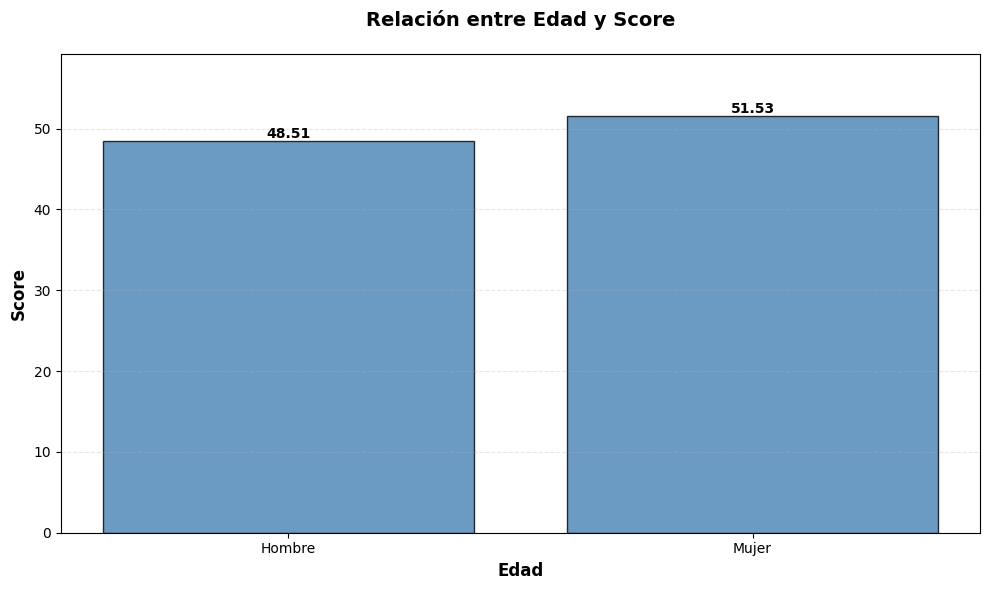

In [31]:
generoes = ['Hombre', 'Mujer']
score_medio=[]
for i in range(2):
    data_filtrada = data[data['Gender'] == i]
    score_medio.append(data_filtrada['Spending Score (1-100)'].mean().round(2))
    print(f'El score medio de los clientes {generoes[i]} es: {score_medio[i]}')

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras
barras = ax.bar(generoes, score_medio, color='steelblue', alpha=0.8, edgecolor='black')

# Añadir valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., altura,
            f'{altura}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')



# Personalizar el gráfico
ax.set_xlabel('Edad', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Relación entre Edad y Score', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(score_medio) * 1.15)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar diseño
plt.tight_layout()
plt.show()

## 4. SCORE MEDIO POR EDAD




18-25
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
5             6       1   22                  17                      76
7             8       1   23                  18                      94
13           14       1   24                  20                      77
15           16       0   22                  20                      79
17           18       0   20                  21                      66
21           22       0   25                  24                      73
29           30       1   23                  29                      87
31           32       1   21                  30                      73
33           34       0   18                 

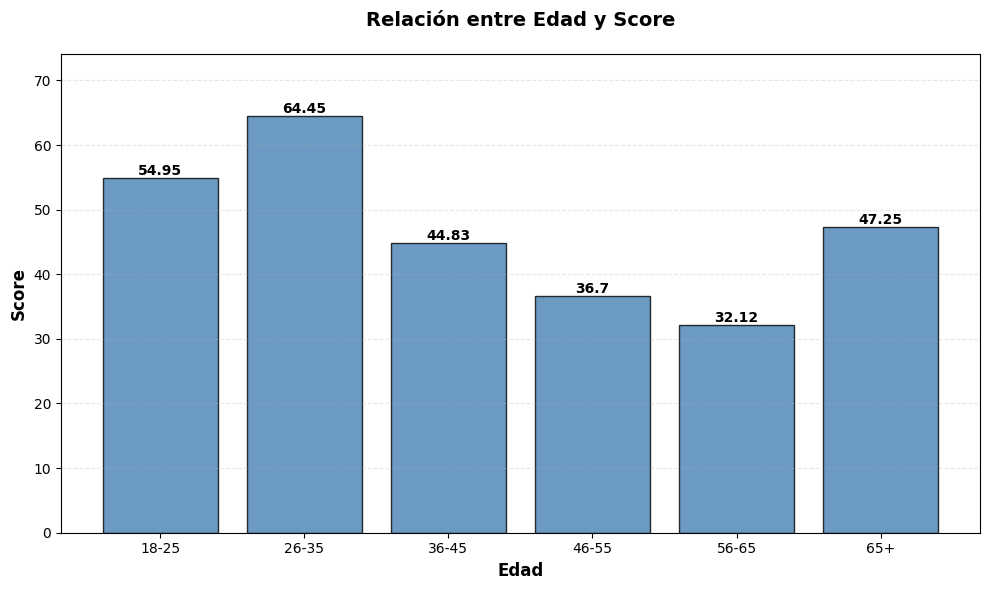

In [32]:
edades = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

scores = []
for edad in edades:
    print(edad)
    if edad == '65+':
        data_filtrada = data[data['Age'] > 65]
    else:
        data_filtrada = data[data['Age'].between(int(edad.split('-')[0]), int(edad.split('-')[1]))]
    print(data_filtrada)
    score_medio = data_filtrada['Spending Score (1-100)'].mean().round(2)
    scores.append(score_medio)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras
barras = ax.bar(edades, scores, color='steelblue', alpha=0.8, edgecolor='black')

# Añadir valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., altura,
            f'{altura}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalizar el gráfico
ax.set_xlabel('Edad', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Relación entre Edad y Score', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(scores) * 1.15)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar diseño
plt.tight_layout()
plt.show()

## 5. SCORE MEDIO POR RANGO SALARIAL

15-25
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1       0   19                  15                      39
1            2       0   21                  15                      81
2            3       1   20                  16                       6
3            4       1   23                  16                      77
4            5       1   31                  17                      40
5            6       1   22                  17                      76
6            7       1   35                  18                       6
7            8       1   23                  18                      94
8            9       0   64                  19                       3
9           10       1   30                  19                      72
10          11       0   67                  19                      14
11          12       1   35                  19                      99
12          13       1   58                  20           

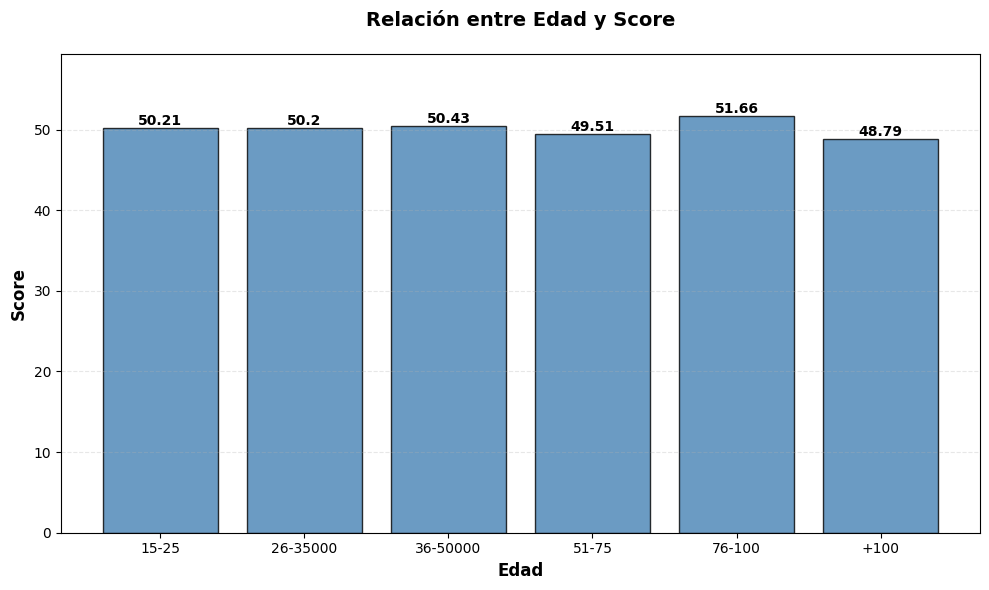

In [33]:
salarios = ['15-25', '26-35000', '36-50000', '51-75', '76-100', '+100']

scores = []
for salario in salarios:
    print(salario)
    if salario == '+100':
        data_filtrada = data[data['Annual Income (k$)'] > 100]
    else:
        data_filtrada = data[data['Annual Income (k$)'].between(int(salario.split('-')[0]), int(salario.split('-')[1]))]
    print(data_filtrada)
    score_medio = data_filtrada['Spending Score (1-100)'].mean().round(2)
    scores.append(score_medio)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras
barras = ax.bar(salarios, scores, color='steelblue', alpha=0.8, edgecolor='black')

# Añadir valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., altura,
            f'{altura}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalizar el gráfico
ax.set_xlabel('Edad', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Relación entre Edad y Score', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(scores) * 1.15)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar diseño
plt.tight_layout()
plt.show()

## 6. CLUSTERING

## VERIFICACION DE LOS CAMPOS POR SI SOBRA ALGO

In [34]:
print(data.columns)
data = data.drop('CustomerID', axis=1)
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


## 6.1 STANDARIZACION

In [35]:
scaler = StandardScaler()
indexado = scaler.fit_transform(data)
print(indexado)

[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [ 0.88640526 -1.20926872 -1.66266033  1.00159627]
 [ 0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [ 0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.12815215  1.80493225 -1.58632148 -1.83237767]
 [ 0.88640526 -0.6351352  -1.58632148  0.84631002]
 [-1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [ 0.88640526 -0.27630176 -1.58632148  1.89449216]
 [ 0.88640526  1.37433211 -1.54815205 -1.36651894]
 [ 0.88640526 -1.06573534 -1.54815205  1.04041783]
 [-1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [-1.12815215 -1.20926872 -1.54815205  1.11806095]
 [ 0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [-1.12815215 -1.3528021  -1.50998262  0.61338066]
 [-1.12815215  0.94373197 -1.43364376 -0.82301709]
 [ 0.88640526 -0.27630176 -1.43

## K

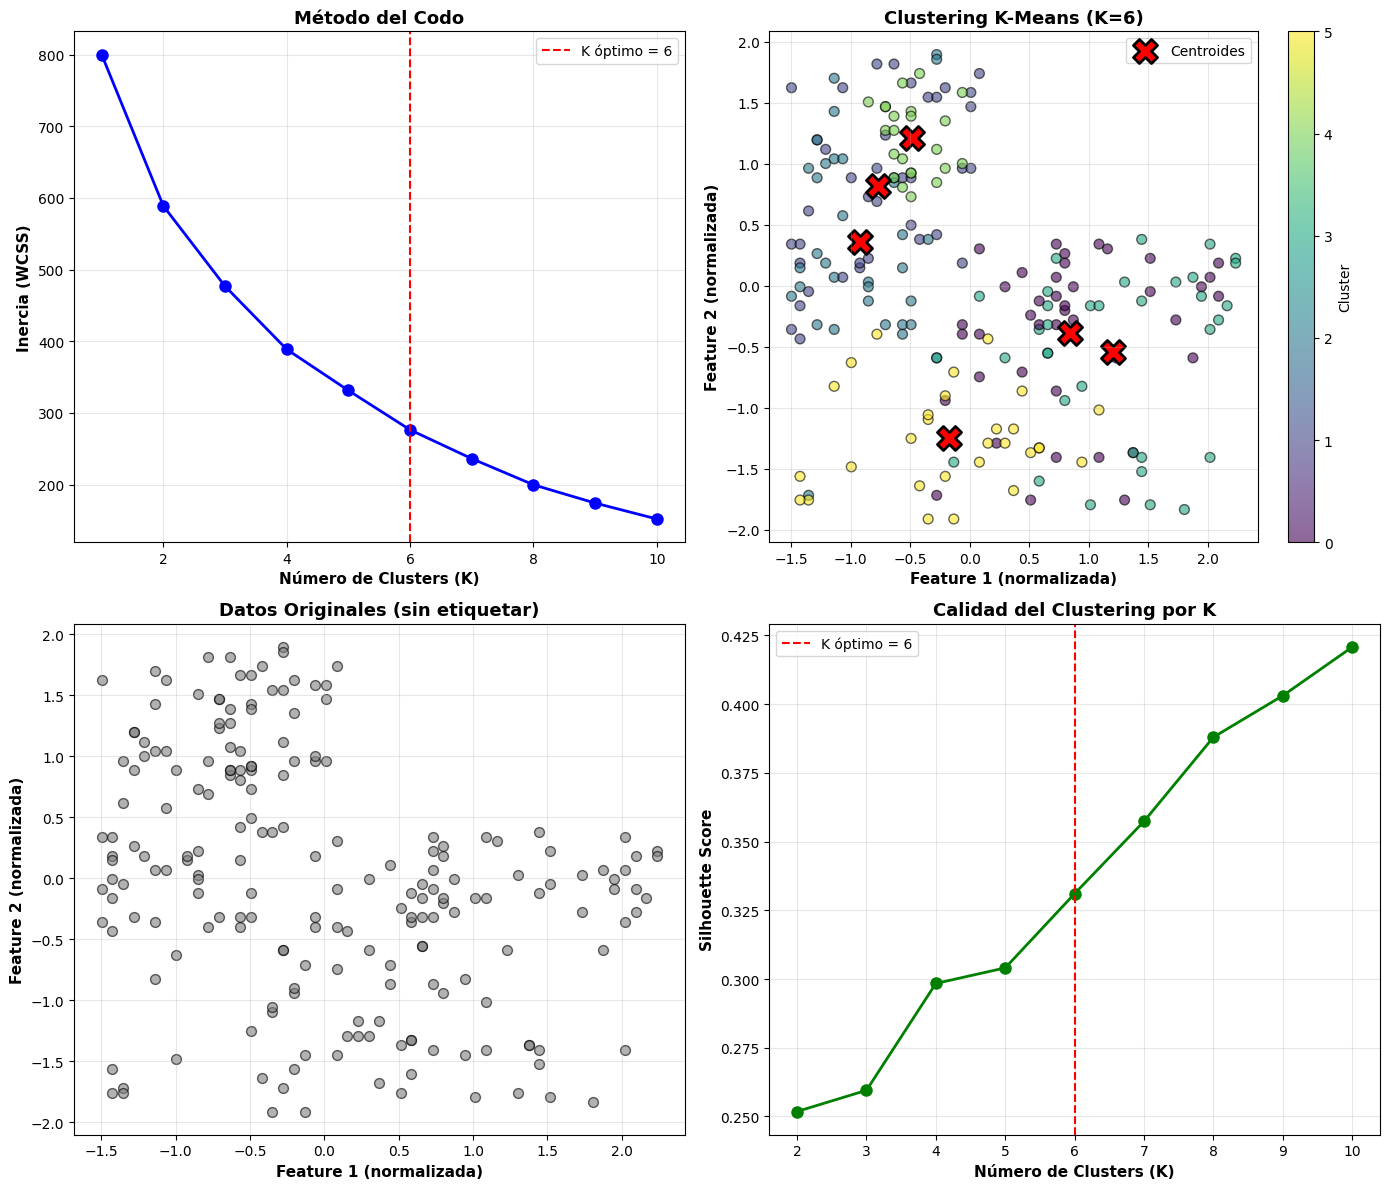

In [36]:
# ============================================
# 3. MÉTODO DEL CODO (Elbow Method)
# ============================================
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(indexado)
    inertias.append(kmeans.inertia_)

# ============================================
# 4. APLICAR K-MEANS CON K ÓPTIMO
# ============================================
k_optimo = 6
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(indexado)
centroides = kmeans.cluster_centers_

# ============================================
# 5. MÉTRICAS DE EVALUACIÓN
# ============================================
silhouette = silhouette_score(indexado, y_pred)
davies_bouldin = davies_bouldin_score(indexado, y_pred)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Método del Codo
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].axvline(x=k_optimo, color='red', linestyle='--',
                   label=f'K óptimo = {k_optimo}')
axes[0, 0].set_xlabel('Número de Clusters (K)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Inercia (WCSS)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Método del Codo', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Gráfico 2: Clusters encontrados
scatter = axes[0, 1].scatter(indexado[:, 1], indexado[:, 3],
                             c=y_pred, cmap='viridis',
                             s=50, alpha=0.6, edgecolors='black')
axes[0, 1].scatter(centroides[:, 1], centroides[:, 3],
                   c='red', marker='X', s=300,
                   edgecolors='black', linewidths=2,
                   label='Centroides')
axes[0, 1].set_xlabel('Feature 1 (normalizada)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Feature 2 (normalizada)', fontsize=11, fontweight='bold')
axes[0, 1].set_title(f'Clustering K-Means (K={k_optimo})',
                     fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Cluster')

# Gráfico 3: Datos originales
axes[1, 0].scatter(indexado[:, 1], indexado[:, 3],
                   c='gray', s=50, alpha=0.6, edgecolors='black')
axes[1, 0].set_xlabel('Feature 1 (normalizada)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Feature 2 (normalizada)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Datos Originales (sin etiquetar)',
                     fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Comparación de métricas por K
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(indexado)
    silhouette_scores.append(silhouette_score(indexado, labels))

axes[1, 1].plot(range(2, 11), silhouette_scores, 'go-',
                linewidth=2, markersize=8)
axes[1, 1].axvline(x=k_optimo, color='red', linestyle='--',
                   label=f'K óptimo = {k_optimo}')
axes[1, 1].set_xlabel('Número de Clusters (K)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Calidad del Clustering por K',
                     fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [43]:
print("-" * 50)
print("### DATOS A INTRODUCIR POR USUARIO ###")
sexo = int(input("INTRO 0 HOMBRE 1 MUJER: "))
edad= int(input("INTRO EDAD: "))
salario= int(input("INTRO salario en K$: "))
score = int(input("INTRO score 1 - 99: "))
dato= pd.DataFrame([{'Gender': sexo , 'Age': edad, 'Annual Income (k$)':salario, 'Spending Score (1-100)': score}])
sexoes=['Hombre', 'Mujer']
print(dato)
datoescalado = scaler.transform(dato)
print(datoescalado)
yresultado = kmeans.predict(dato)
print(f"EL RESULTADO DE GENERO {sexoes[sexo]} EDAD {edad} SALARIO {salario} SCORE {score} ES GRUPO {yresultado}")

--------------------------------------------------
### DATOS A INTRODUCIR POR USUARIO ###
INTRO 0 HOMBRE 1 MUJER: 1
INTRO EDAD: 18
INTRO salario en K$: 25
INTRO score 1 - 99: 99
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   18                  25                      99
[[ 0.88640526 -1.49633548 -1.3573049   1.89449216]]
EL RESULTADO DE GENERO Mujer EDAD 18 SALARIO 25 SCORE 99 ES GRUPO [2]


## REHACEMOS SIN NORMALIZAR

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


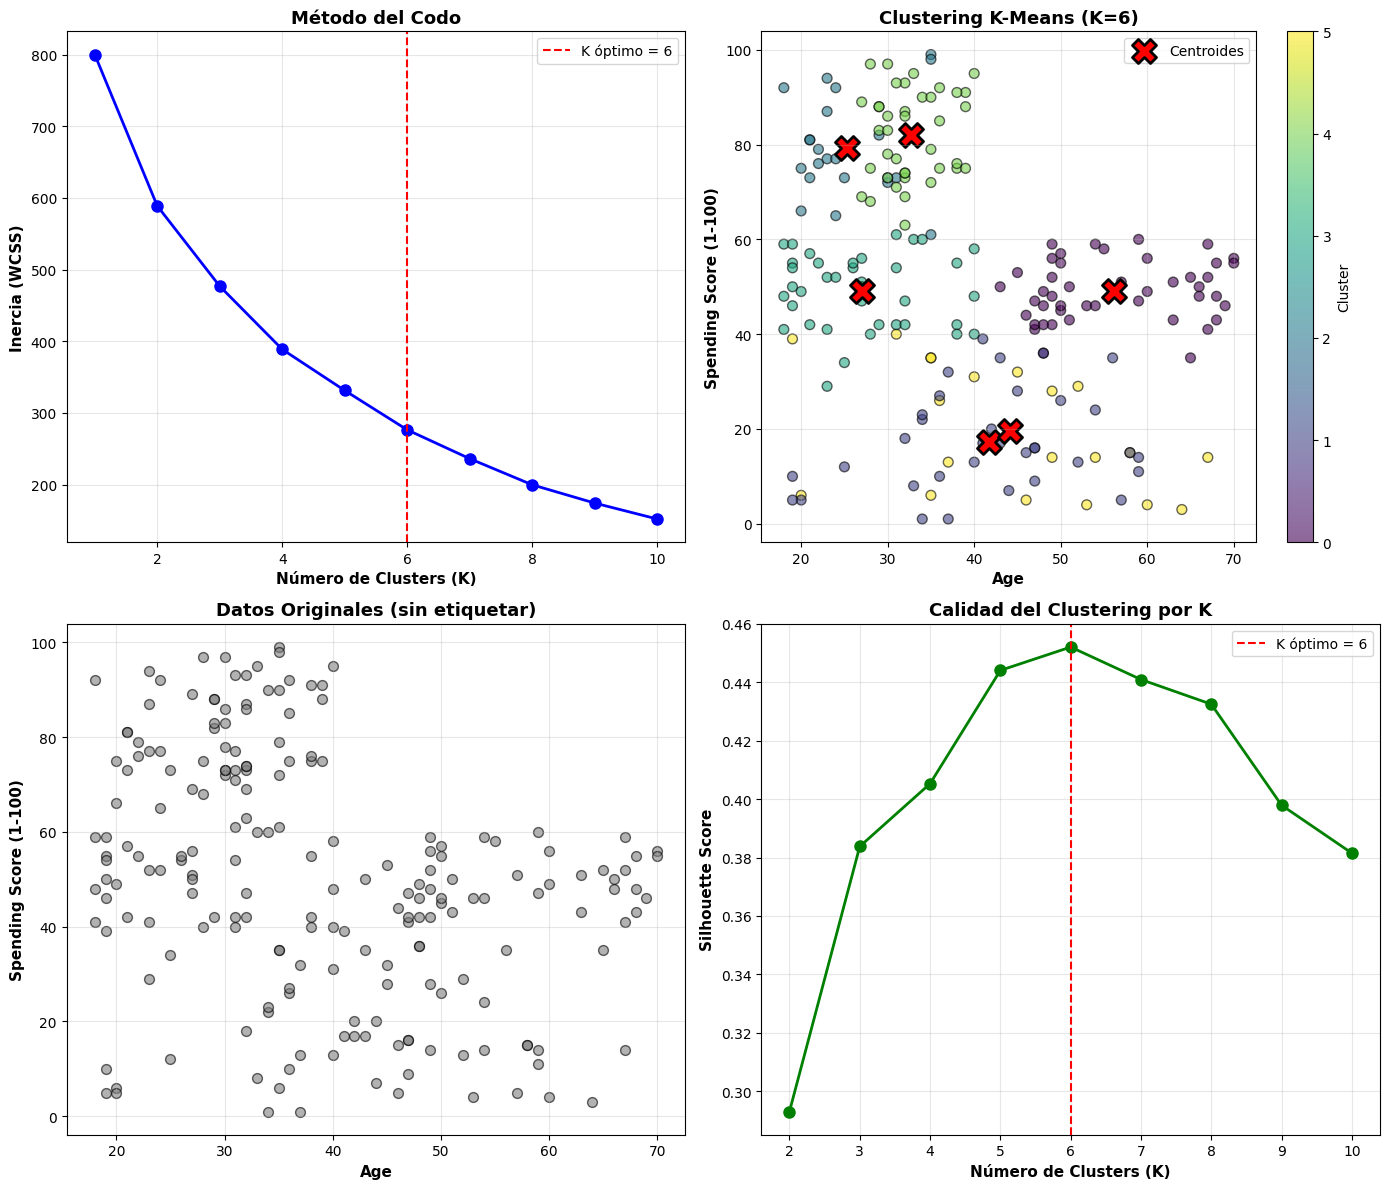

In [37]:
data = pd.read_csv('/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/6-SEGMENTACION CLIENTES/Mall_Customers.csv')
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
print(data.head())

# Drop CustomerID as it's not a feature for clustering
data = data.drop('CustomerID', axis=1)
print(data.head())

k_optimo = 6
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(data)
centroides = kmeans.cluster_centers_

# ============================================
# 5. MÉTRICAS DE EVALUACIÓN
# ============================================
silhouette = silhouette_score(data, y_pred)
davies_bouldin = davies_bouldin_score(data, y_pred)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Método del Codo
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].axvline(x=k_optimo, color='red', linestyle='--', label=f'K óptimo = {k_optimo}')
axes[0, 0].set_xlabel('Número de Clusters (K)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Inercia (WCSS)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Método del Codo', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Gráfico 2: Clusters encontrados
# Use .iloc for integer-location based indexing and specific column names for labels
scatter = axes[0, 1].scatter(data.iloc[:, 1], data.iloc[:, 3],
                             c=y_pred, cmap='viridis',
                             s=50, alpha=0.6, edgecolors='black')
axes[0, 1].scatter(centroides[:, 1], centroides[:, 3],
                   c='red', marker='X', s=300,
                   edgecolors='black', linewidths=2,
                   label='Centroides')
axes[0, 1].set_xlabel(data.columns[1], fontsize=11, fontweight='bold') # Label with actual column name
axes[0, 1].set_ylabel(data.columns[3], fontsize=11, fontweight='bold') # Label with actual column name
axes[0, 1].set_title(f'Clustering K-Means (K={k_optimo})',
                     fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Cluster')

# Gráfico 3: Datos originales
# Use .iloc for integer-location based indexing and specific column names for labels
axes[1, 0].scatter(data.iloc[:, 1], data.iloc[:, 3],
                   c='gray', s=50, alpha=0.6, edgecolors='black')
axes[1, 0].set_xlabel(data.columns[1], fontsize=11, fontweight='bold') # Label with actual column name
axes[1, 0].set_ylabel(data.columns[3], fontsize=11, fontweight='bold') # Label with actual column name
axes[1, 0].set_title('Datos Originales (sin etiquetar)',
                     fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Comparación de métricas por K
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

axes[1, 1].plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1, 1].axvline(x=k_optimo, color='red', linestyle='--', label=f'K óptimo = {k_optimo}')
axes[1, 1].set_xlabel('Número de Clusters (K)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Calidad del Clustering por K',
                     fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [38]:
print("\nDETALLE DE CADA CLUSTER:")
print("-" * 50)
for i in range(k_optimo):
    n_puntos = np.sum(y_pred == i)
    porcentaje = (n_puntos / len(y_pred)) * 100
    print(f"Cluster {i}: {n_puntos} puntos ({porcentaje:.1f}%)")
    print(f"  Centroide: {centroides[i]}")
print("-" * 50)
print("### DATOS DE PRUEBA ###")

dato= pd.DataFrame([{'Gender': 1 , 'Age': 44, 'Annual Income (k$)':48, 'Spending Score (1-100)': 42}])
print(dato)
yresultado = kmeans.predict(dato)
print(yresultado)






DETALLE DE CADA CLUSTER:
--------------------------------------------------
Cluster 0: 45 puntos (22.5%)
  Centroide: [ 0.55555556 56.15555556 53.37777778 49.08888889]
Cluster 1: 35 puntos (17.5%)
  Centroide: [ 0.42857143 41.68571429 88.22857143 17.28571429]
Cluster 2: 22 puntos (11.0%)
  Centroide: [ 0.59090909 25.27272727 25.72727273 79.36363636]
Cluster 3: 38 puntos (19.0%)
  Centroide: [ 0.65789474 27.         56.65789474 49.13157895]
Cluster 4: 39 puntos (19.5%)
  Centroide: [ 0.53846154 32.69230769 86.53846154 82.12820513]
Cluster 5: 21 puntos (10.5%)
  Centroide: [ 0.61904762 44.14285714 25.14285714 19.52380952]
--------------------------------------------------
### DATOS DE PRUEBA ###
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   44                  48                      42
[0]


## CENTROIDES:

|NUM| GENERO | EDAD |SALARIO | SCORE |
|--|--|--|--|--|
|1|0.55|56.15|53.37|49.08|
|2|0.42|41.68|88.23|17.28|
|3|0.59|25.27|25.72|79.36|
|4|0.65|27|56.65|49.13|
|5|0.53|32.70|86.54|82.12|
|6|0.62|44.14|25.14|19.52|

## QUE SE PUEDE DECIR DE LOS GRUPOS:

|NUM| GENERO | EDAD |SALARIO | SCORE |TAMAÑO |
|--|--|--|--|--|--|
|1| INDIFERENTE|56 AÑOS|53.3K|49|22.5% PUNTOS|
|2| HOMBRE|42 AÑOS|88.2K|17|17.5% PUNTOS|
|3| MUJER|25 AÑOS|25.7K|79.5|11% PUNTOS|
|4| MUJER|27 AÑOS|56.6K|49|19% PUNTOS|
|5| INDIFERENTE|33 AÑOS|86.5K|82| 19.5% PUNTOS|
|6| MUJER|44 AÑOS|25.1K|19.5|10.5% PUNTOS|

In [42]:
print("-" * 50)
print("### DATOS A INTRODUCIR POR USUARIO ###")
sexo = int(input("INTRO 0 HOMBRE 1 MUJER: "))
edad= int(input("INTRO EDAD: "))
salario= int(input("INTRO salario en K$: "))
score = int(input("INTRO score 1 - 99: "))
dato= pd.DataFrame([{'Gender': sexo , 'Age': edad, 'Annual Income (k$)':salario, 'Spending Score (1-100)': score}])
sexoes=['Hombre', 'Mujer']
print(dato)
yresultado = kmeans.predict(dato)
print(f"EL RESULTADO DE GENERO {sexoes[sexo]} EDAD {edad} SALARIO {salario} SCORE {score} ES GRUPO {yresultado}")

--------------------------------------------------
### DATOS A INTRODUCIR POR USUARIO ###
INTRO 0 HOMBRE 1 MUJER: 0
INTRO EDAD: 47
INTRO salario en K$: 18
INTRO score 1 - 99: 50
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   47                  18                      50
EL RESULTADO DE GENERO Hombre EDAD 47 SALARIO 18 SCORE 50 ES GRUPO [5]
